In [29]:
# imp libs
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# defining a function x, 
def f(x):
    return 4*x**2 - 2*x + 5 

In [31]:
# put x value to find derivate
f(2.0)

17.0

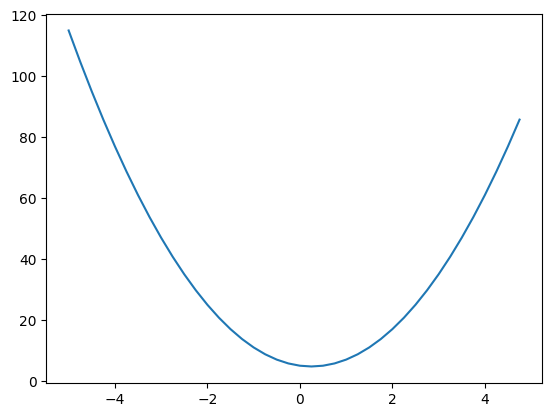

In [32]:
xs= np.arange(-5, 5 , 0.25)
ys=f(xs)
plt.plot(xs,ys)
# see how curve changes when x value is changed a bit
# important to tune NN (weights)

In [33]:
# value object
# sclar value wrapped
class Value :
    
    def __init__(self,data):
        self.data = data
        
    def __repr__(self):
        return f"Value(data={self.data})" # to print data . so that we can understand.

# defining operator
    def __add__(self, other): # other is  the value of b in this case.
        out = Value(self.data +  other.data) 
        return out
#we can add other operations like multiplication and etc.. def __mul__(self,other):...


# assume we have two values a and be and we do operations 
a = Value(4.0)
b = Value(-3.0) # it could be negetive
# lets add
#a + b   # we get the operand (+) is unsupported.py doesnt know to ad value obj so define it.
# a.__add__.b will be caled by the fun
a + b # we get the out put

    

Value(data=1.0)

In [35]:
# but we need to know what values produce other values
# basically to keep track as a pointer, created new variable like children in this case for ex.

class Value :
    #we create an empty set children for efficiency.
    def __init__(self,data, _children=(), _op='', label=''): # _op to know what operation they using
        self.data = data
        self._prev = set(_children) # children will be empty and prev will be empty set
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})" # to print data . so that we can understand.

# defining operator
    def __add__(self, other):
        out = Value(self.data +  other.data, (self,other), '+')  # (self,other) acts as children, also added  + that is _op
        return out
#we can add other operations like multiplication and etc.. def __mul__(self,other):...
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

# assume we have two values a and be and we do operations 
a = Value(4.0, label='a') 
b = Value(-3.0,label='b') # it could be negetive
c = Value(2.0, label='c')

# lets add
#a + b   # we get the operand (+) is unsupported.py doesnt know to ad value obj so define it.
# a.__add__.b will be caled by the fun
res1 = a+b; res1.label = 'res1'
res = res1 + c ;res.label = 'res'

# to take this much deeper, we added another variable 
e = Value(-5.0, label = 'e')
final = res * e ; final.label = 'final'
final # prints res  * e
    

Value(data=-15.0)

In [36]:
# the childern (_prev) that has self and other).so it prints the value
#res._prev


In [37]:
#res._op # suppose to show the operator


In [38]:
#pip install digraph
res

Value(data=3.0)

In [39]:
# This Python code is used to visualize a computational graph built from a 
# custom automatic differentiation system (like a small version of PyTorch’s autograd).
# It shows how values and operations are connected and how gradients flow through them.
# It uses the graphviz library to create a visual diagram of the computation graph.

from graphviz import Digraph  # type: ignore # Import Digraph class to build and render graphs visually

def trace(root):
    """
    This function performs a reverse traversal of the computation graph starting
    from the `root` node (final output of computation), and collects:
    - All nodes (values involved in the computation)
    - All edges (connections between parent and child values)
    """
    nodes, edges = set(), set()  # Initialize empty sets to hold nodes and edges

    def build(v):
        # Recursively add nodes and their connections (edges)
        if v not in nodes:
            nodes.add(v)  # Mark this node as visited
            for child in v._prev:  # Traverse all parent nodes of v
                edges.add((child, v))  # Add an edge from child → v (edge points forward)
                build(child)  # Recursively build the graph from the child

    build(root)  # Start from the final output node
    return nodes, edges  # Return all discovered nodes and edges


def draw_dot(root):
    """
    This function takes the root node of a computation graph and uses `graphviz`
    to draw a visual representation of the full graph.
    Each node displays the value's data, and the operation (like '+') that produced it.
    """
    # Create a new directed graph with left-to-right layout
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})

    # Get all the nodes and edges in the graph
    nodes, edges = trace(root)

    # Create graph nodes for each value node
    for n in nodes:
        uid = str(id(n))  # Unique ID for the node (based on its memory address)

        # Create a rectangle node with value's data (and optionally label/grad)
        dot.node(name=uid, label="{%s | data %.4f}" % (n.label, n.data), shape='record')

        # If this value was produced by an operation (like +, *, etc.)
        if n._op:
            # Create a node to represent the operation (e.g., '+', '*', etc.)
            dot.node(name=uid + n._op, label=n._op)
            # Draw an edge from the op node to the value node (output)
            dot.edge(uid + n._op, uid)

        # Draw edges from input nodes to the op node (input to output connection)
    for n1,n2 in edges:
         dot.edge(str(id(n1)), str(id(n2)) + n2._op)  # Connect input → op node of output

    return dot  # Return the final graph object for rendering


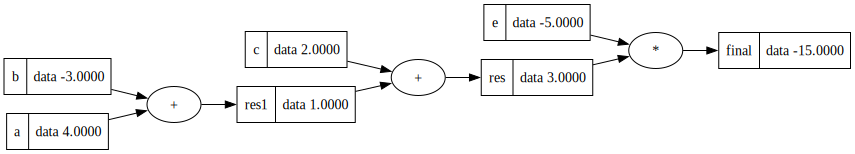

In [40]:
draw_dot(final)
#note the nodes (+) in the digram are not original , these are not value obj
# the digram indicates a forward pass

In [41]:
#what we have done so far
"""we built math experssions and they are sclar values.we can do a forward 
pass and build a math expression...that narrows down to a single final value"""

# now we will build a back propogation
"""strating from the end, we revese and calculate the gradient(derivative of each value ) 
with respect to final value(final). 
d(final/res), d(final/e)... and so on"""
#in NN , it will be interested in derivative of the loss function in our case final value
# with respect to weights of NN that is he other values like a,b c, in this case.
#these respresent the weights of NN (leaf nodes) 
# however the data will be fixed, weights changes




'strating from the end, we revese and calculate the gradient(derivative of each value ) \nwith respect to final value(final). \nd(final/res), d(final/e)... and so on'

In [42]:


class Value :
    #we create an empty set children for efficiency.
    def __init__(self,data, _children=(), _op='', label=''): # _op to know what operation they using
        self.data = data
        self.grad = 0.0 # initial 0.
        self._prev = set(_children) # children will be empty and prev will be empty set
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})" # to print data . so that we can understand.

# defining operator
    def __add__(self, other):
        out = Value(self.data +  other.data, (self,other), '+')  # (self,other) acts as children, also added  + that is _op
        return out
#we can add other operations like multiplication and etc.. def __mul__(self,other):...
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
        
    def tanh(self):
        x=  self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out= Value(t,(self, ), 'tanh')
        return out
    

# assume we have two values a and be and we do operations 
a = Value(2.0, label='a') 
b = Value(-3.0,label='b') # it could be negetive
c = Value(10.0, label='c')

# lets add
#a + b   # we get the operand (+) is unsupported.py doesnt know to ad value obj so define it.
# a.__add__.b will be caled by the fun
res1 = a+b; res1.label = 'res1'
res = res1 + c ;res.label = 'res'

# to take this much deeper, we added another variable 
e = Value(-5.0, label = 'e')
final = res * e ; final.label = 'final'
final # prints res  * e
    

Value(data=-45.0)

In [43]:
# This Python code is used to visualize a computational graph built from a 
# custom automatic differentiation system (like a small version of PyTorch’s autograd).
# It shows how values and operations are connected and how gradients flow through them.
# It uses the graphviz library to create a visual diagram of the computation graph.

from graphviz import Digraph  # Import Digraph class to build and render graphs visually

def trace(root):
    """
    This function performs a reverse traversal of the computation graph starting
    from the `root` node (final output of computation), and collects:
    - All nodes (values involved in the computation)
    - All edges (connections between parent and child values)
    """
    nodes, edges = set(), set()  # Initialize empty sets to hold nodes and edges

    def build(v):
        # Recursively add nodes and their connections (edges)
        if v not in nodes:
            nodes.add(v)  # Mark this node as visited
            for child in v._prev:  # Traverse all parent nodes of v
                edges.add((child, v))  # Add an edge from child → v (edge points forward)
                build(child)  # Recursively build the graph from the child

    build(root)  # Start from the final output node
    return nodes, edges  # Return all discovered nodes and edges


def draw_dot(root):
    """
    This function takes the root node of a computation graph and uses `graphviz`
    to draw a visual representation of the full graph.
    Each node displays the value's data, and the operation (like '+') that produced it.
    """
    # Create a new directed graph with left-to-right layout
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})

    # Get all the nodes and edges in the graph
    nodes, edges = trace(root)

    # Create graph nodes for each value node
    for n in nodes:
        uid = str(id(n))  # Unique ID for the node (based on its memory address)

        # Create a rectangle node with value's data (and optionally label/grad)
        dot.node(name=uid, label="{%s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')

        # If this value was produced by an operation (like +, *, etc.)
        if n._op:
            # Create a node to represent the operation (e.g., '+', '*', etc.)
            dot.node(name=uid + n._op, label=n._op)
            # Draw an edge from the op node to the value node (output)
            dot.edge(uid + n._op, uid)

        # Draw edges from input nodes to the op node (input to output connection)
    for n1,n2 in edges:
         dot.edge(str(id(n1)), str(id(n2)) + n2._op)  # Connect input → op node of output

    return dot  # Return the final graph object for rendering


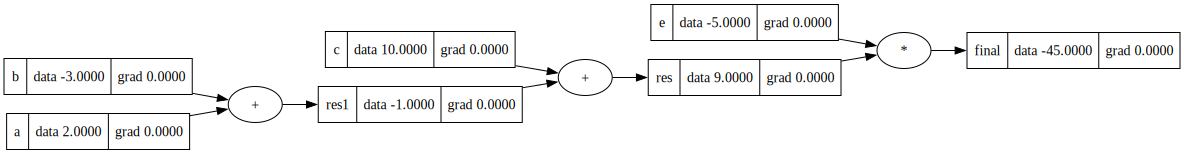

In [44]:
draw_dot(final)
# we can see the grad is 0, because it represents the derivative of tht value 

In [45]:
# we can manuallty set the grad value
#final.grad = 1.0

In [46]:
# we will fill the gradient. 
def something():
 
    h=0.0001  # taking a small value of h 
    
    a = Value(2.0, label='a') 
    b = Value(-3.0,label='b') #
    c = Value(10.0, label='c')
    res1 = a+b; res1.label = 'res1'
    e = Value(-2.0, label = 'e')
    res = res1 + c ;res.label = 'res'
    final = res * e ; final.label = 'final'
    final1 = final.data # withoud .data no output, 
    
    a = Value(2.0 , label='a') # adding h to a
    b = Value(-3.0,label='b') 
    c = Value(10.0, label='c')
    res1 = a+b; res1.label = 'res1'
    res = res1 + c ;res.label = 'res'
    e = Value(-2.0, label = 'e') 
    final = res * e ; final.label = 'final'
    final2 = final.data  # measuers the derivateve

    print((final2 - final1)/h) # prints derivative of final wrt a
    
something()

0.0


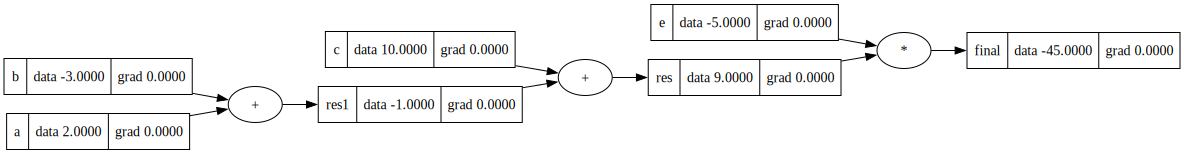

In [47]:
draw_dot(final) 
# we see the derivate (grad) in final
# we do a kind of gradient check

In [19]:
#we need to derive d final/d c
#and also d final/ d res1
    # how we derive d final/d c, we know derive final wrt d, but how final is sencituve to res1
    #we should know the impact of res1 impacts res and res impacting final

# basically applying chain rule.
# to know how they impact each other =-> check recall calculus/chainrule

In [48]:
c.grad = -2.0
res1.grad = -2.0

In [49]:
# we will fill the gradient. 
def something():
 
    h=0.0001  # taking a small value of h 
    
    a = Value(2.0, label='a') 
    b = Value(-3.0,label='b') #
    c = Value(10.0, label='c')
    res1 = a+b; res1.label = 'res1'
    e = Value(-2.0, label = 'e')
    res = res1 + c ;res.label = 'res'
    final = res * e ; final.label = 'final'
    final1 = final.data # withoud .data no output, 
    
    a = Value(2.0 , label='a') # adding h to a
    b = Value(-3.0,label='b') 
    c = Value(10.0, label='c')
    #c.data+=h  --> gives -2
    res1 = a+b; res1.label = 'res1'
    res = res1 + c ;res.label = 'res'
    e = Value(-2.0, label = 'e') 
    final = res * e ; final.label = 'final'
    final2 = final.data  # measuers the derivateve

    print((final2 - final1)/h) # prints derivative of final wrt a
    
something()

0.0


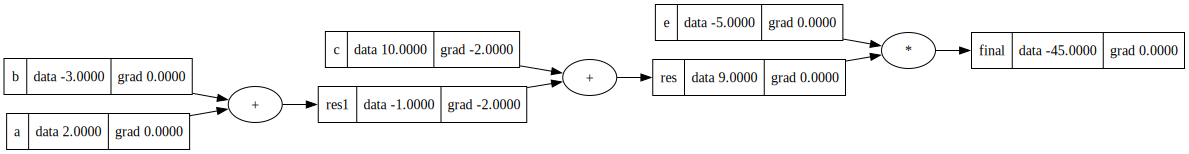

In [50]:
draw_dot(final)
# we got -2 for res1,and c ,....moving backward and distributing the grad to its child
# value changes with small chnages

# we iterate via all nodes one by one and  locally applied chain rule (if u good at calculus u survive hehe!)
# we know what the local derivate and mul to derivate ...so thats a back propogation its a recursiv application of chain ruke backwards 

In [51]:
# we can change values of variables (lil) and this results in increment of final 

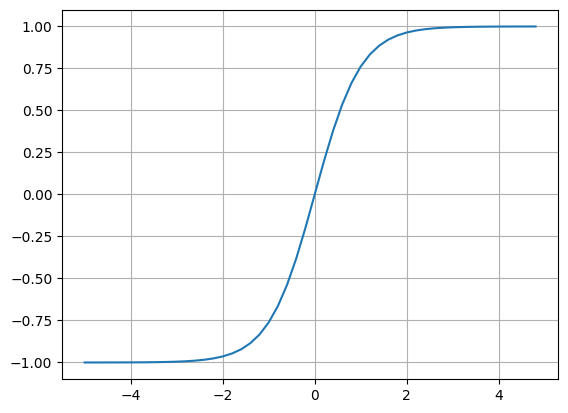

In [52]:
# look into NN formula
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();
# we need to build NN (layers).
#wixi flows as weights and bias.
# this goes throu activation function example tanh


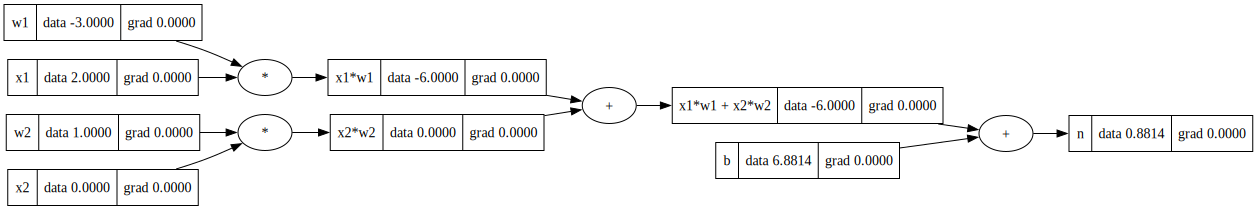

In [ ]:

# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
#we do- x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
#output
o = n.tanh(); o.label = 'o' 
# we go back to the value class and add def tanh() go check


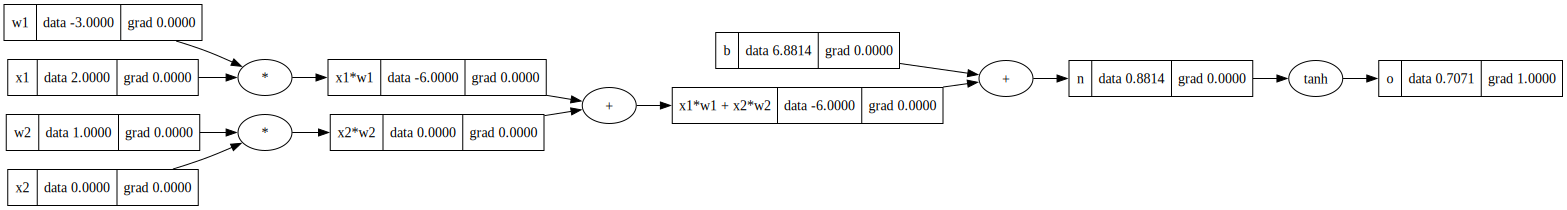

In [ ]:
# if the bias is increaed or change the value, so that we get nice numbers.
# now we do backpro
o.grad = 1.0
draw_dot(o)
# we get grad as 1

In [ ]:
# 0  = tanh(n)
# and see the derivative of tanh - something like 1/1-x2
# we try different grad values and see the changes , that is basically back prop
#we see the influence of the bias and weights x and w to the final output
# these steps till here were manually backprop which is crazy